# Machine Learning Assignment

**Dataset**:       STUDENT OUTCOME

**Student ID**: s5518850    

**Student Name**:  Adley Purton

## Imports

Add imports here as needed.

Remember to **re-run the cell when you add imports**, so it gets loaded into the virtual notebook environment!

In [5]:
# Data and Datasets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import DBSCAN

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Hyper-parameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature selection & feature engineering
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

# Stats
from scipy.stats import randint as sp_randint
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz

# Utils
import pprint
import numpy as np
from time import time
import openpyxl

## Loading the dataset

In [7]:
import pandas as pd

df = pd.read_csv('data/student-outcome.csv')

# printing out dataset info
print("\nGeneral info\n")
print(df.info())

print("\nStatistics (of numeric features)\n")
print(df.describe())

print("\nInfo about the class\n")
print(df['class'].describe(),"\n")
print(df['class'].value_counts())

df.head()


General info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   marital_status                                4424 non-null   int64  
 1   application_mode                              4424 non-null   int64  
 2   application_order                             4424 non-null   int64  
 3   course_id                                     4424 non-null   int64  
 4   day_eve_attendance                            4421 non-null   float64
 5   prev_qual                                     4421 non-null   float64
 6   prev_qual_grade                               4419 non-null   float64
 7   nationality                                   4420 non-null   float64
 8   mother_qual                                   3881 non-null   float64
 9   father_qual                                   29

,marital_status,application_mode,application_order,course_id,day_eve_attendance,prev_qual,prev_qual_grade,nationality,mother_qual,father_qual,...,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_0,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp,class
0,1,17,5,171,1.0,1.0,122.0,1.0,19.0,12.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,1
1,1,15,1,9254,1.0,1.0,160.0,1.0,1.0,NaN,...,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79,2
2,1,1,5,9070,1.0,1.0,122.0,1.0,37.0,37.0,...,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,1
3,1,17,2,9773,1.0,1.0,122.0,1.0,NaN,NaN,...,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0.0,1.0,100.0,1.0,37.0,NaN,...,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79,2


## Exploratory data analysis

Section for exploratory data analysis, to address **Tasks 1.1 and 1.2**.

**OBS:** You may need to do some data cleaning before you do your full exploratory data analysis, though you will find that some functions we'll cover in this unit are able to handle things like missing values and non-numeric data.

**Create more cells as needed!**


Statistics (of numeric features)

       marital_status  application_mode  application_order    course_id  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       day_eve_attendance    prev_qual  prev_qual_grade  nationality  \
count         4421.000000  4421.000000      4419.000000  4420.000000   
mean             0.890749     4.580185       132.874451     1.873982   
std              0.311990    10.219634        22.406415     6.917593   
m

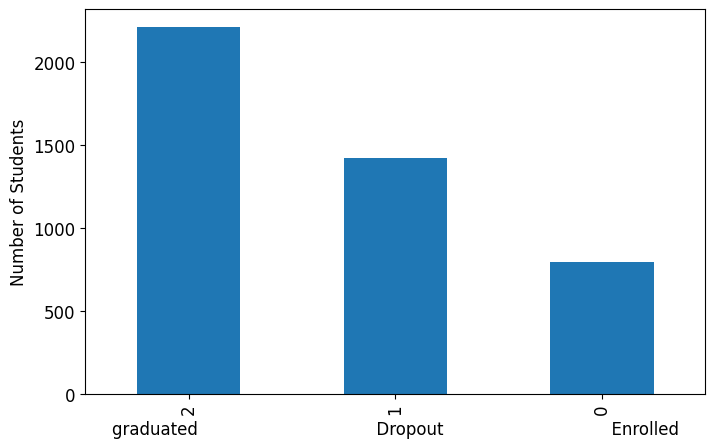

In [92]:
print("\nStatistics (of numeric features)\n")
print(df.describe())

print("\nInfo about the class\n")
print(df['class'].describe(),"\n")
print(df['class'].value_counts())

print(df['class'].value_counts())
print("\nThe number of students graduated:",df['class'].value_counts()[2])
print("\nThe number of dropout students:",df['class'].value_counts()[1])

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12, 'figure.figsize': (8, 5)}) # set font and plot size for chart
plt.ylabel('Number of Students') # label for y axis
plt.xlabel('graduated                                  Dropout                                Enrolled')
df['class'].value_counts().plot(kind="bar");





0.0    4308
1.0     110
Name: international, dtype: int64

The number of national students: 4308

The number of international students: 110


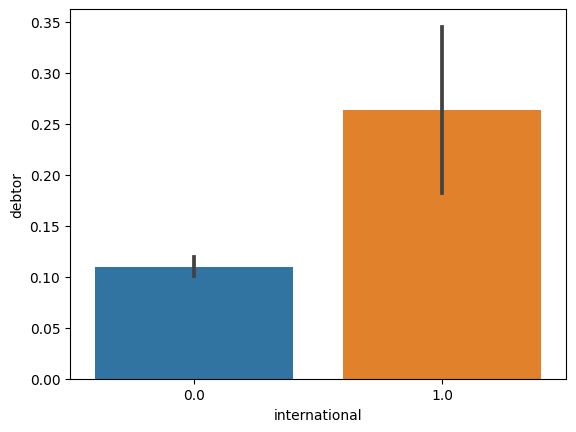

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['international'].value_counts())
print("\nThe number of national students:",df['international'].value_counts()[0])
print("\nThe number of international students:",df['international'].value_counts()[1])

sns.barplot( x='international', y='debtor', data=df, )

plt.show()





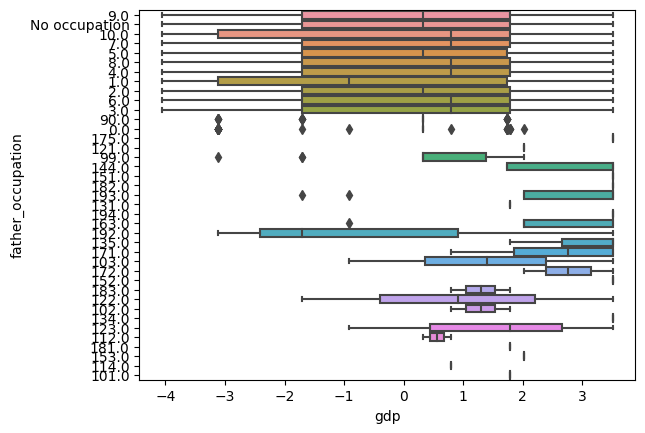

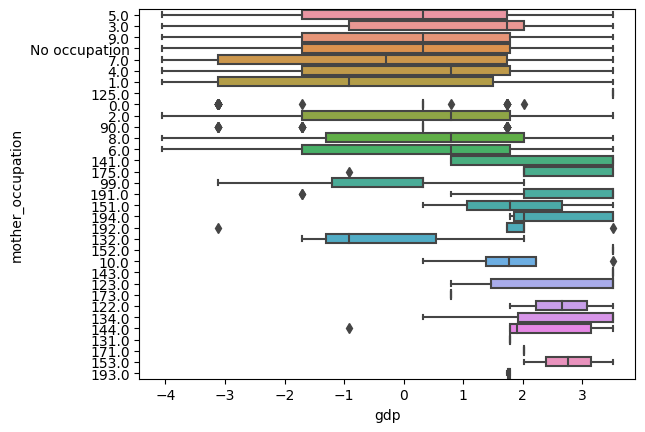

In [37]:
sns.boxplot( x="gdp", y='father_occupation', data=df, )
plt.show()

sns.boxplot( x="gdp", y='mother_occupation', data=df, )
plt.show()



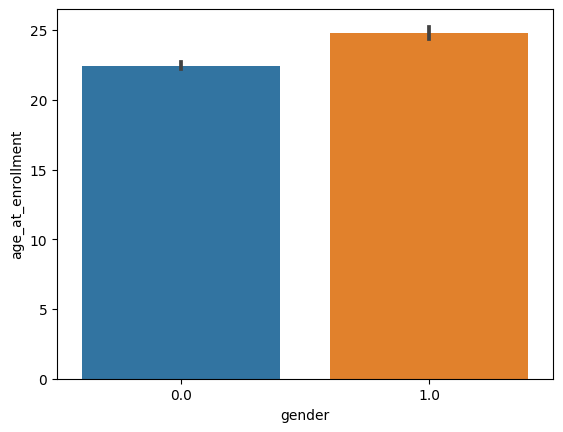

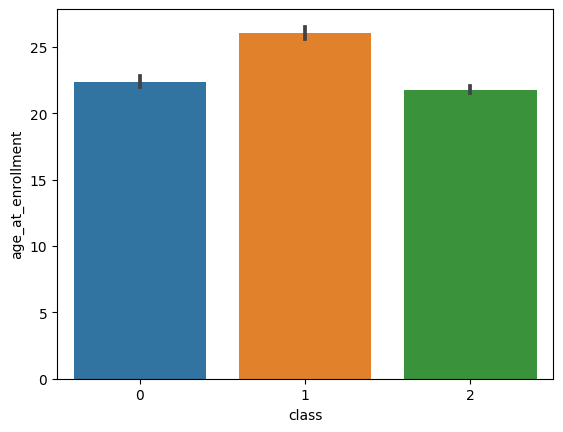

In [43]:
sns.barplot( x='gender', y='age_at_enrollment', data=df,)
plt.show()


sns.barplot( x='class', y='age_at_enrollment', data=df,)
plt.show()

## Core data pre-processing
Do core data pre-processing here, which is not part of your machine learning experiments.

For example, this may be to convert non-numeric features into numeric ones.

In [9]:


df["mother_qual"].fillna("No qual", inplace = True)
df["father_qual"].fillna("No qual", inplace = True)
df["mother_occupation"].fillna("No occupation", inplace = True)
df["father_occupation"].fillna("No occupation", inplace = True)
df["educational_special_needs"].fillna("No special needs", inplace = True)# replacing the missing values with values which hold statistics instead of just NaN
df.isnull().sum()

marital_status                                  0
application_mode                                0
application_order                               0
course_id                                       0
day_eve_attendance                              3
prev_qual                                       3
prev_qual_grade                                 5
nationality                                     4
mother_qual                                     0
father_qual                                     0
mother_occupation                               0
father_occupation                               0
admission_grade                                 5
displaced                                       3
educational_special_needs                       0
debtor                                          3
tuition_fees_up_to_date                         4
gender                                          4
scholarship_holder                              4
age_at_enrollment                               2


## Task 2.1 - ML Workflow to Critically Evaluate

In [28]:
# Dropping all rows with missing values
df = df.dropna()

# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
X = df.iloc[:,:len(df.columns)-1]
y = df.iloc[:,len(df.columns)-1]

# Splitting dataset for hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=None
                                                   )

In [27]:
# Creating and testing a Logistic Regression Model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Printing out performance of the model
print("Accuracy: %s" % (metrics.accuracy_score(y_test, y_pred)*100))

ValueError: could not convert string to float: 'No qual'

## Task 2.3 - Evaluation of Improved ML Workflow

Add code for running your **improved** machine learning experiments below.


In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

df = df.dropna()

df_encoded = pd.get_dummies(df,columns=['marital_status','application_mode','application_order','course_id','day_eve_attendance','prev_qual','prev_qual_grade','nationality','mother_qual','father_qual','mother_occupation','father_occupation','admission_grade','displaced','educational_special_needs','debtor','tuition_fees_up_to_date','gender','scholarship_holder','age_at_enrollment','international','curricular_units_1st_sem_credited','curricular_units_1st_sem_0','curricular_units_1st_sem_evaluations','curricular_units_1st_sem_approved','curricular_units_1st_sem_grade','curricular_units_1st_sem_without_evaluations','curricular_units_2nd_sem_credited','curricular_units_2nd_sem_0','curricular_units_2nd_sem_evaluations','curricular_units_2nd_sem_approved','curricular_units_2nd_sem_grade','curricular_units_2nd_sem_without_evaluations','unemployment_rate','inflation_rate','gdp','class',])

df_encoded = df_encoded.dropna()

X = df_encoded.iloc[:, :len(df_encoded.columns)-1]

y = df_encoded.iloc[:, len(df_encoded.columns)-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred) * 100

print("Accuracy: %s" % accuracy)

# Incorporating cross-validation

cv_scores = cross_val_score(model, X, y, cv=5)

average_cv_accuracy = cv_scores.mean() * 100

print("Cross-Validation Accuracy: %s" % average_cv_accuracy)

Accuracy: 100.0
Cross-Validation Accuracy: 100.0
